In [1]:
# Import libraries

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import LinearSVC
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

In [3]:
# Import data

data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
# Look at train dataset

print('Number of samples in train: ', data.shape[0], '\n')
print('Number of columns in train: ', data.shape[1], '\n')
print('All columns in train: ', data.columns.values, '\n')
print('First samples in train: ')
display(data.head())

Number of samples in train:  1460 

Number of columns in train:  81 

All columns in train:  ['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch'

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Look at test dataset

print('Number of samples in test: ', test_data.shape[0], '\n')
print('Number of columns in test: ', test_data.shape[1], '\n')
print('All columns in test: ', test_data.columns.values, '\n')
print('First samples in test: ')
display(test_data.head())

Number of samples in test:  1459 

Number of columns in test:  80 

All columns in test:  ['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'S

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
# Save Id columns in train and test data and SalePrice (target) from train

train_id = data['Id']
test_id = test_data['Id']
target = data['SalePrice']

# Remove Ids

data.drop(columns=['Id'], inplace=True)
test_data.drop(columns=['Id'], inplace=True)

In [7]:
# Create dataframe with train and test data 

all_data = pd.concat([data, test_data], sort=False).reset_index(drop=True)
print('All data shape: ', all_data.shape, '\n')
print('Data types: \n')
print(all_data.info())

All data shape:  (2919, 80) 

Data types: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      29

In [8]:
# Check missing values in train, test and combined data

missing_values_df = pd.concat([data.isnull().sum(), test_data.isnull().sum(),
                               all_data.isnull().sum(),
                               (all_data.isnull().sum()/all_data.shape[0])],
                              axis=1, sort=False,
                              keys=['Train', 'Test', 'All', '%'],
                              names=['Columns'])
missing_values_df = missing_values_df[missing_values_df['All'] > 0]
# display(missing_values_df.sort_values(by='%', ascending=False)) 
print('Number of columns with missing values: {}'.format(missing_values_df.shape[0]))

Number of columns with missing values: 35


In [9]:
# Discover columns with different types

categorical_columns = all_data.select_dtypes(include='object').columns
numerical_columns = all_data.select_dtypes(exclude='object').columns
print('Number of all columns: {}\n'.format(all_data.shape[1]))
print('Number of categorical columns: {}\n'.format(categorical_columns.shape[0]))
print('Categorical columns: ', categorical_columns.values, '\n')
print('Number of numerical columns: {}'.format(numerical_columns.shape[0]))
print('Numerical columns: ', numerical_columns.values, '\n')

Number of all columns: 80

Number of categorical columns: 43

Categorical columns:  ['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st'
 'Exterior2nd' 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation'
 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2'
 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' 'KitchenQual'
 'Functional' 'FireplaceQu' 'GarageType' 'GarageFinish' 'GarageQual'
 'GarageCond' 'PavedDrive' 'PoolQC' 'Fence' 'MiscFeature' 'SaleType'
 'SaleCondition'] 

Number of numerical columns: 37
Numerical columns:  ['MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF'
 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath'
 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Firepla

In [10]:
# Check missing values in categorical and numerical columns

print('Number of categorical columns with missing values: ',
      missing_values_df[missing_values_df.index.isin(categorical_columns)].shape[0])
display(missing_values_df[missing_values_df.index.isin(categorical_columns)])

Number of categorical columns with missing values:  23


Columns,Train,Test,All,%
MSZoning,0,4.0,4,0.001370
Alley,1369,1352.0,2721,0.932169
Utilities,0,2.0,2,0.000685
Exterior1st,0,1.0,1,0.000343
Exterior2nd,0,1.0,1,0.000343
MasVnrType,8,16.0,24,0.008222
BsmtQual,37,44.0,81,0.027749
BsmtCond,37,45.0,82,0.028092
BsmtExposure,38,44.0,82,0.028092
BsmtFinType1,37,42.0,79,0.027064


In [11]:
# Check missing values in numerical columns

print('Number of numerical columns with missing values: ',
      missing_values_df[missing_values_df.index.isin(numerical_columns)].shape[0])
display(missing_values_df[missing_values_df.index.isin(numerical_columns)])

Number of numerical columns with missing values:  12


Columns,Train,Test,All,%
LotFrontage,259,227.0,486,0.166495
MasVnrArea,8,15.0,23,0.007879
BsmtFinSF1,0,1.0,1,0.000343
BsmtFinSF2,0,1.0,1,0.000343
BsmtUnfSF,0,1.0,1,0.000343
TotalBsmtSF,0,1.0,1,0.000343
BsmtFullBath,0,2.0,2,0.000685
BsmtHalfBath,0,2.0,2,0.000685
GarageYrBlt,81,78.0,159,0.054471
GarageCars,0,1.0,1,0.000343


Columns highly correlated with target:  ['OverallQual' 'YearBuilt' 'YearRemodAdd' 'TotalBsmtSF' '1stFlrSF'
 'GrLivArea' 'FullBath' 'TotRmsAbvGrd' 'GarageCars' 'GarageArea'
 'SalePrice']


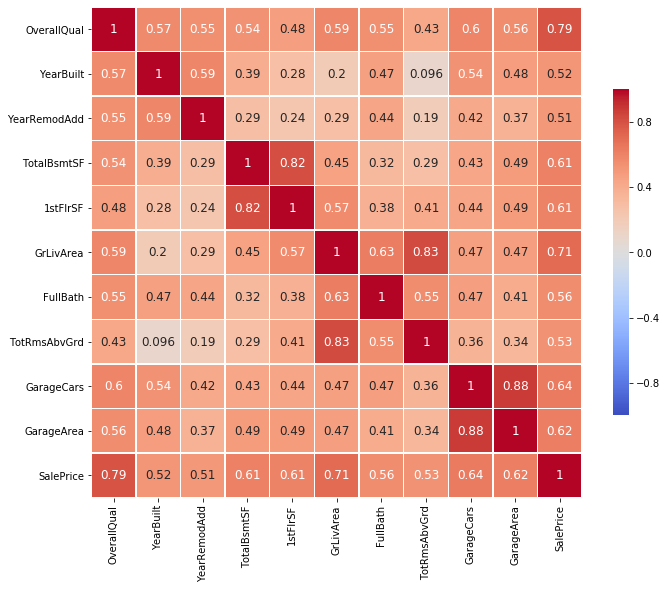

In [12]:
# Look at highest correlations with target in train data

corr_matrix = data.corr()
high_corr_columns = corr_matrix.index[abs(corr_matrix['SalePrice'] > 0.5)]
print('Columns highly correlated with target: ', high_corr_columns.values)
high_corr_matrix = data[high_corr_columns]

fig, ax = plt.subplots(figsize=(11, 15))
heatmap = sns.heatmap(high_corr_matrix.corr(),
                     square=True,
                     linewidths = .5,
                     cmap = 'coolwarm',
                     cbar_kws = {'shrink': .4},
                     vmin = -1, 
                     vmax = 1,
                     annot = True,
                     annot_kws = {'size': 12})
ax.set_yticklabels(high_corr_matrix.columns, rotation = 0)
ax.set_xticklabels(high_corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [13]:
# OverallQual - Overall material and finish quality, numerical ordinal feature
# No missing values

data[['OverallQual', 'SalePrice']].groupby('OverallQual', as_index=False).median()

,OverallQual,SalePrice
0,1,50150
1,2,60000
2,3,86250
3,4,108000
4,5,133000
5,6,160000
6,7,200141
7,8,269750
8,9,345000
9,10,432390


[Text(0.5, 1.0, 'SalePrice depending on OverallQual')]

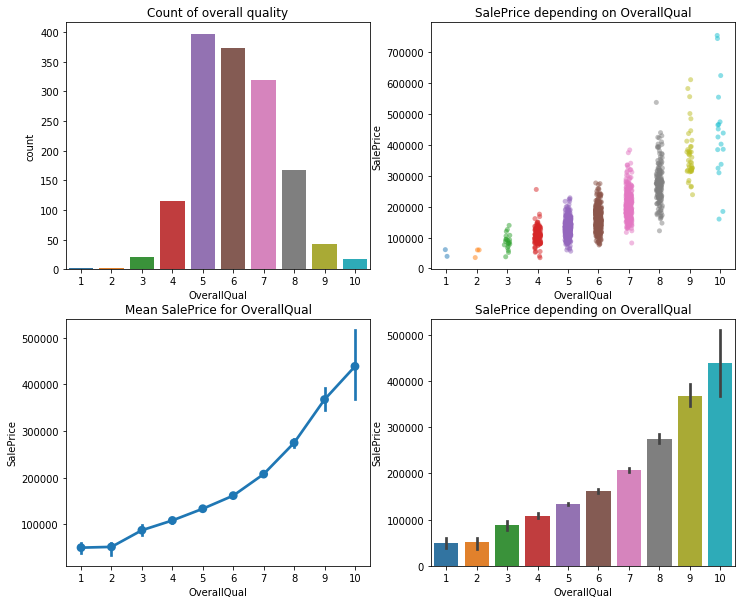

In [14]:
# 1 - Very Poor, 10 - Very Excellent

# Most houses had Average(5), Above Average(6) and Good(7) 
# Price of house increases with increasing OverallQuality
# Correlation matrix and plots show that it is important predictor

fig, [(ax1, ax2), (ax3, ax4)] = plt.subplots(2, 2, figsize=(12, 10))
sns.countplot(data["OverallQual"], ax=ax1)
ax1.set(title='Count of overall quality')

sns.stripplot(x='OverallQual', y='SalePrice', data=data, alpha=0.5, ax=ax2)
ax2.set(title='SalePrice depending on OverallQual')

sns.pointplot(x='OverallQual', y='SalePrice', data=data, ax=ax3)
ax3.set(title='Mean SalePrice for OverallQual')

sns.barplot(x='OverallQual', y='SalePrice', data=data, ax=ax4)
ax4.set(title='SalePrice depending on OverallQual')

In [15]:
# YearBuilt - Original construction date, numerical feature
# No missing values
# Min.year is 1872, max.year is 2010

# YearRemodAdd - Remodel date (same as construction date if no remodeling or additions)
# Numerical feature, no missing values

display(pd.DataFrame(data['YearBuilt'].describe())) 

,YearBuilt
count,1460.000000
mean,1971.267808
std,30.202904
min,1872.000000
25%,1954.000000
50%,1973.000000
75%,2000.000000
max,2010.000000


[Text(0.5, 1.0, 'Distribution of YearRemodAdd')]

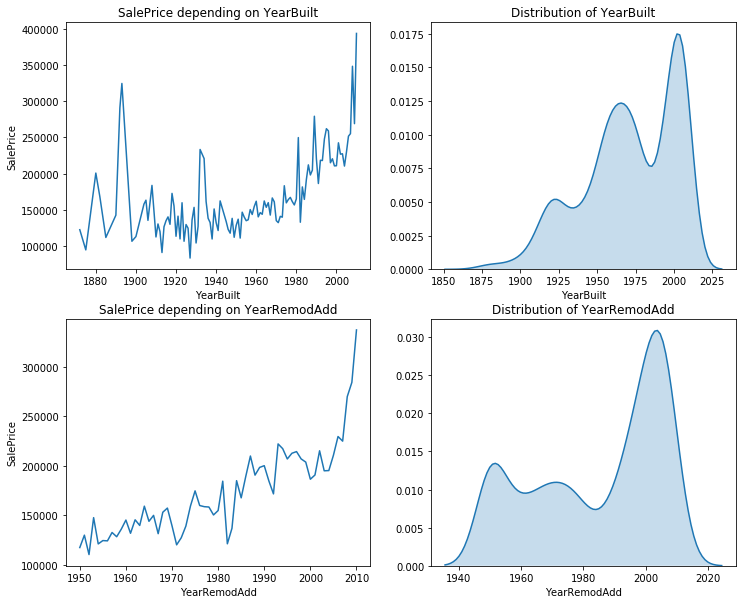

In [16]:
# Plot mean price of houses, that were built in different years

# Most of the houses are built after 1950
# Modern houses were sold at higher prices than old houses, in general, except
# some houses built under 1900 year and some houses built in 1930-1940 years
# Distribution of YearBuilt is left-skewed (will require transformation)

mean_price_year = data[['YearBuilt', 'SalePrice']].groupby('YearBuilt', as_index=False).mean()
mean_price_remodel = data[['YearRemodAdd', 'SalePrice']].groupby('YearRemodAdd', as_index=False).mean()

fig, [(ax1, ax2), (ax3, ax4)] = plt.subplots(2, 2, figsize=(12, 10))

sns.lineplot(x='YearBuilt', y='SalePrice', data=mean_price_year, ax=ax1)
ax1.set(title='SalePrice depending on YearBuilt')

sns.distplot(data['YearBuilt'], hist=False, kde=True, kde_kws={'shade':True}, ax=ax2)
ax2.set(title='Distribution of YearBuilt')

sns.lineplot(x='YearRemodAdd', y='SalePrice', data=mean_price_remodel, ax=ax3)
ax3.set(title='SalePrice depending on YearRemodAdd')

sns.distplot(data['YearRemodAdd'], hist=False, kde=True, kde_kws={'shade':True}, ax=ax4)
ax4.set(title='Distribution of YearRemodAdd')

[Text(0.5, 1.0, 'Distribution of 1stFlrSF')]

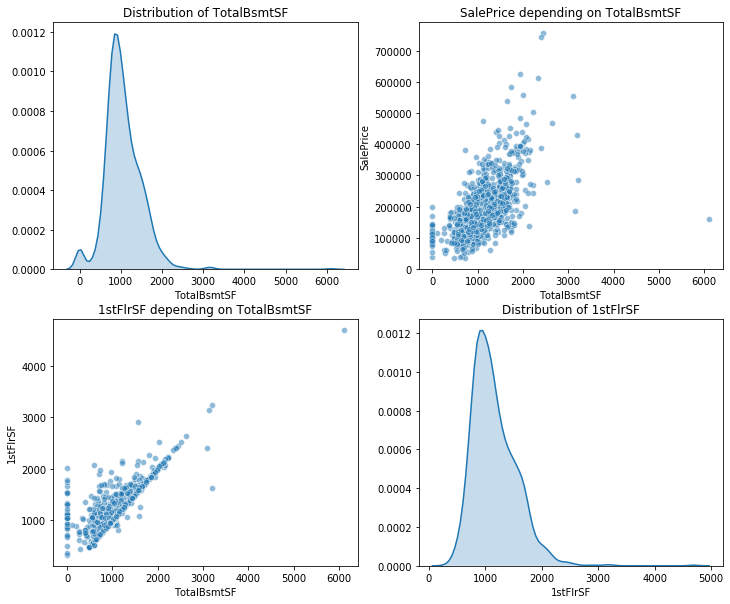

In [17]:
# TotalBsmtSF - total square feet of basement area
# Highly correlated with 1stFlrSF
# 1stFlrSF - First Floor square feet 

# TotalBsmtSF contains 1 missing value in test data

fig, [(ax1, ax2), (ax3, ax4)] = plt.subplots(2, 2, figsize=(12, 10))

sns.distplot(data['TotalBsmtSF'], hist=False, kde=True, kde_kws={'shade':True}, ax=ax1)
ax1.set(title='Distribution of TotalBsmtSF')

sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=data, alpha=0.5, ax=ax2)
ax2.set(title='SalePrice depending on TotalBsmtSF')

sns.scatterplot(x='TotalBsmtSF', y='1stFlrSF', data=data, alpha=0.5, ax=ax3)
ax3.set(title='1stFlrSF depending on TotalBsmtSF')

sns.distplot(data['1stFlrSF'], hist=False, kde=True, kde_kws={'shade':True}, ax=ax4)
ax4.set(title='Distribution of 1stFlrSF')

# Outlier with TotalBsmtSF > 6000 found, may be deleted

[Text(0.5, 1.0, 'GrLivArea depending on TotRmsAbvGrd')]

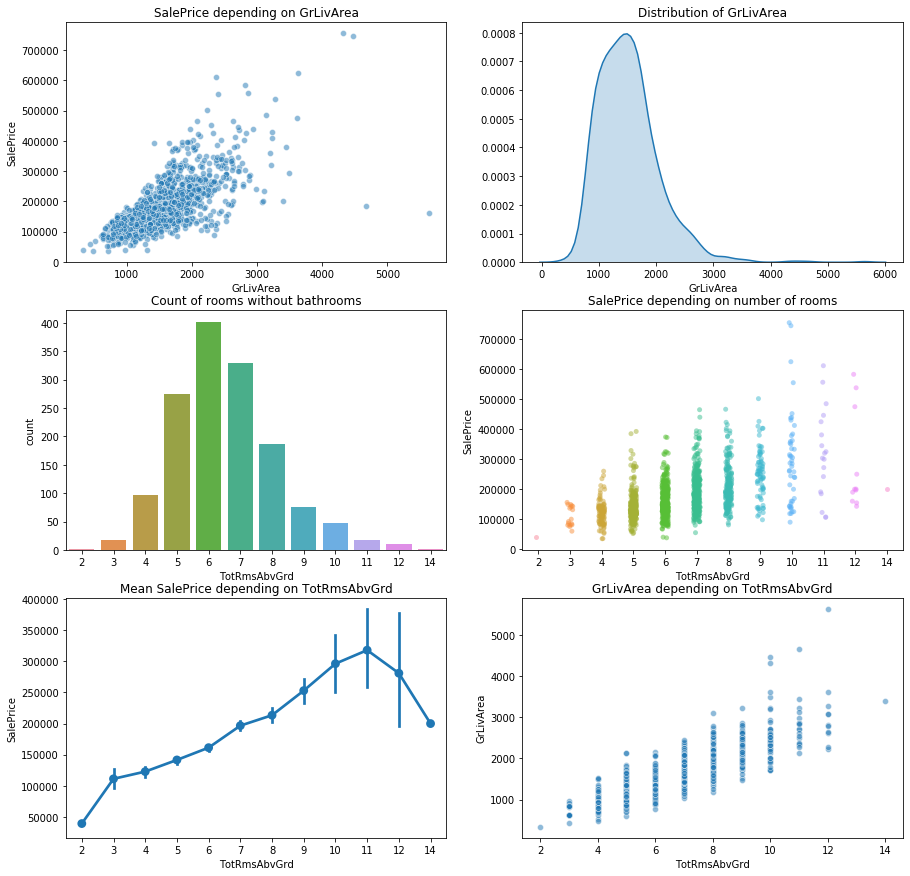

In [19]:
# GrLivArea - living area square feet
# Highly correlated with TotRmsAbvGrd
# Numerical feature, no missing values

# TotRmsAbvGrd - total rooms above grade without bathrooms
# Numerical feauture, no missing values

fig, [(ax1, ax2), (ax3, ax4), (ax5, ax6)] = plt.subplots(3, 2, figsize=(15, 15))

sns.scatterplot(x='GrLivArea', y='SalePrice', data=data, alpha=0.5, ax=ax1)
ax1.set(title='SalePrice depending on GrLivArea')

sns.distplot(data['GrLivArea'], hist=False, kde=True, kde_kws={'shade':True}, ax=ax2)
ax2.set(title='Distribution of GrLivArea')

sns.countplot(data['TotRmsAbvGrd'], ax=ax3)
ax3.set(title='Count of rooms without bathrooms')

sns.stripplot(x='TotRmsAbvGrd', y='SalePrice', data=data, alpha=0.5, ax=ax4)
ax4.set(title='SalePrice depending on number of rooms')

sns.pointplot(x='TotRmsAbvGrd', y='SalePrice', data=data, ax=ax5)
ax5.set(title='Mean SalePrice depending on TotRmsAbvGrd')

sns.scatterplot(x='TotRmsAbvGrd', y='GrLivArea', data=data, alpha=0.5, ax=ax6)
ax6.set(title='GrLivArea depending on TotRmsAbvGrd')

# Outliers found with large GrLivArea and low SalePrice, may be deleted
# Most houses had 5, 6 or 7 rooms
# Price of house doesn't decrease after 11 rooms
# Number of rooms is linearly increasing with living area, maybe only one of features should be used

[Text(0.5, 1.0, 'Mean SalePrice per number of bathrooms')]

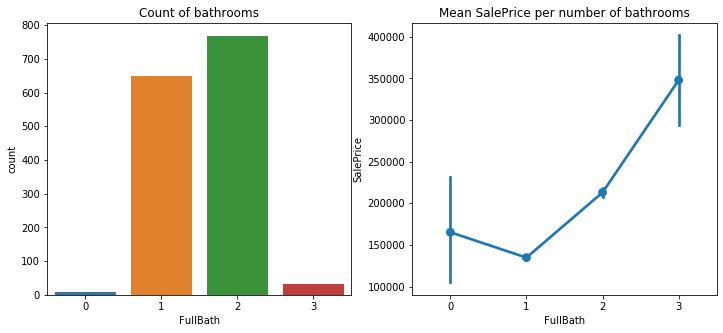

In [20]:
# FullBath - full bathrooms above grade
# Numerical feature, no missing values

# Most houses had 1 or more bathrooms
# Houses with >2 had higher SalePrice

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(data["FullBath"], ax=ax1)
ax1.set(title='Count of bathrooms')

sns.pointplot(x='FullBath', y='SalePrice', data=data, ax=ax2)
ax2.set(title='Mean SalePrice per number of bathrooms')

[Text(0.5, 1.0, 'SalePrice depending on GarageArea')]

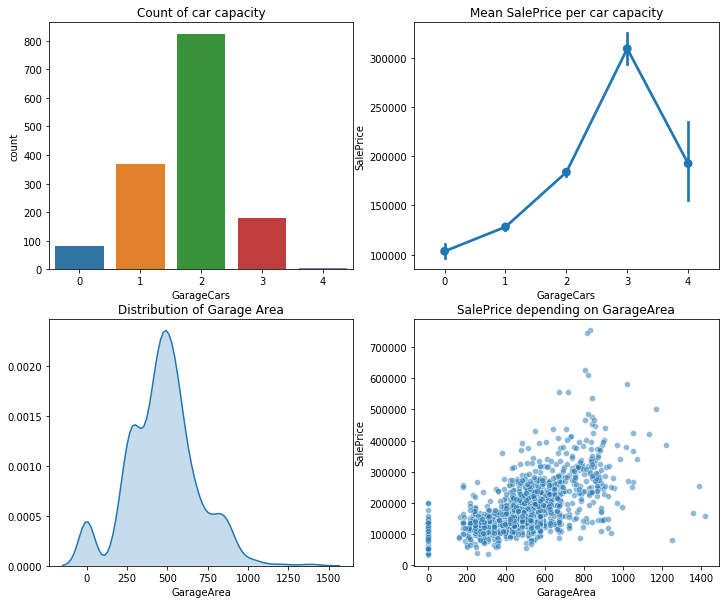

In [21]:
# GarageCars - size of garage in car capacity
# Numerical feature, has missing values in test data
# Super highly correlated with GarageArea
# Has higher correlation with SalePrice than GarageArea

# GarageArea - Size of garage in square feet
# Numerical feature, has missing values in test data

fig, [(ax1, ax2), (ax3, ax4)] = plt.subplots(2, 2, figsize=(12, 10))

sns.countplot(data['GarageCars'], ax=ax1)
ax1.set(title='Count of car capacity')

sns.pointplot(x='GarageCars', y='SalePrice', data=data, ax=ax2)
ax2.set(title='Mean SalePrice per car capacity')

sns.distplot(data['GarageArea'], hist=False, kde=True, kde_kws={'shade':True}, ax=ax3)
ax3.set(title='Distribution of Garage Area')

sns.scatterplot(x='GarageArea', y='SalePrice', data=data, alpha=0.5, ax=ax4)
ax4.set(title='SalePrice depending on GarageArea')

# Most houses had 1 or more car capacity
# Price of house increases with number of cars
# Price mostly increases with increasing of GarageArea (?) 

Among most correlated to target features may be dropped:
1. GarageArea (GarageCars use instead, corr beetween features 0.88)
2. TotRmsAbvGrd (GrLivArea use instead, corr beetween features 0.83)
3. 1stFlrSF (TotalBsmtSF use instead, corr beetween features 0.82)

Look at other features:

[Text(0.5, 1.0, 'SalePrice in different zoning')]

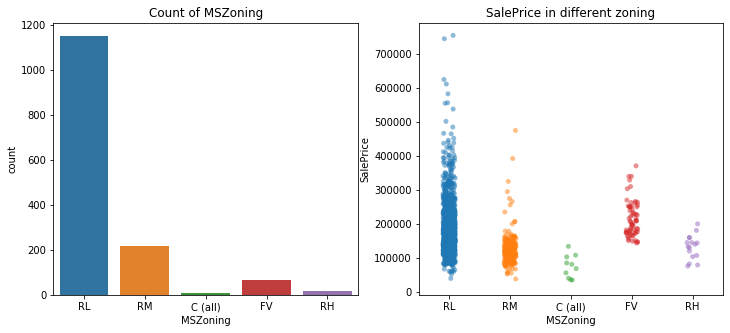

In [22]:
# MSZoning - general zoning classification
# Categorical feature, has 4 missing values in test data

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(data["MSZoning"], ax=ax1)
ax1.set(title='Count of MSZoning')

sns.stripplot(x='MSZoning', y='SalePrice', data=data, alpha=0.5, ax=ax2)
ax2.set(title='SalePrice in different zoning')

# Most houses were from Residential Low Density zoning
# Houses from Floating Village Residential had highest minimum SalePrice

[Text(0.5, 1.0, 'SalePrice for different Alley values')]

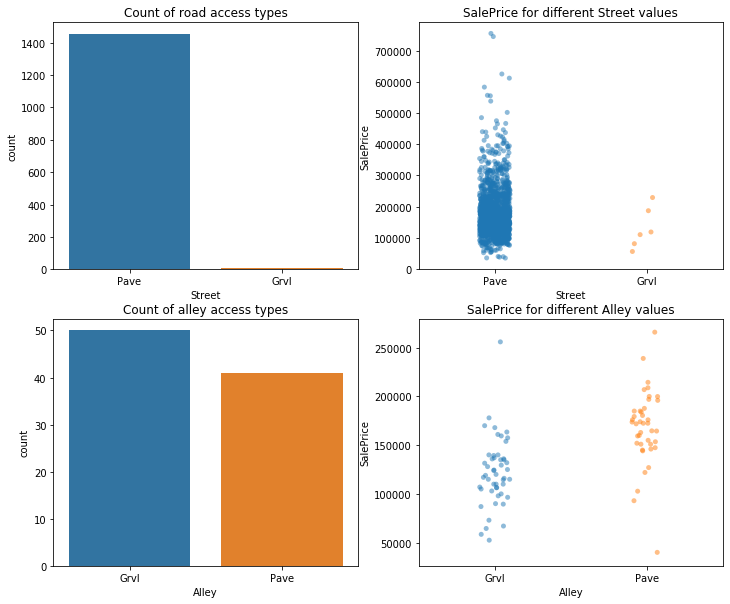

In [23]:
# Street - type of road access to property, categorical, no missing values
# Alley - type of alley access to property, categorical
# Missing values means No access

fig, [(ax1, ax2), (ax3, ax4)] = plt.subplots(2, 2, figsize=(12, 10))

sns.countplot(data['Street'], ax=ax1)
ax1.set(title='Count of road access types')

sns.stripplot(x='Street', y='SalePrice', data=data, alpha=0.5, ax=ax2)
ax2.set(title='SalePrice for different Street values')

sns.countplot(data['Alley'], ax=ax3)
ax3.set(title='Count of alley access types')

sns.stripplot(x='Alley', y='SalePrice', data=data, alpha=0.5, ax=ax4)
ax4.set(title='SalePrice for different Alley values')

[Text(0.5, 1.0, 'SalePrice for different LandContour types')]

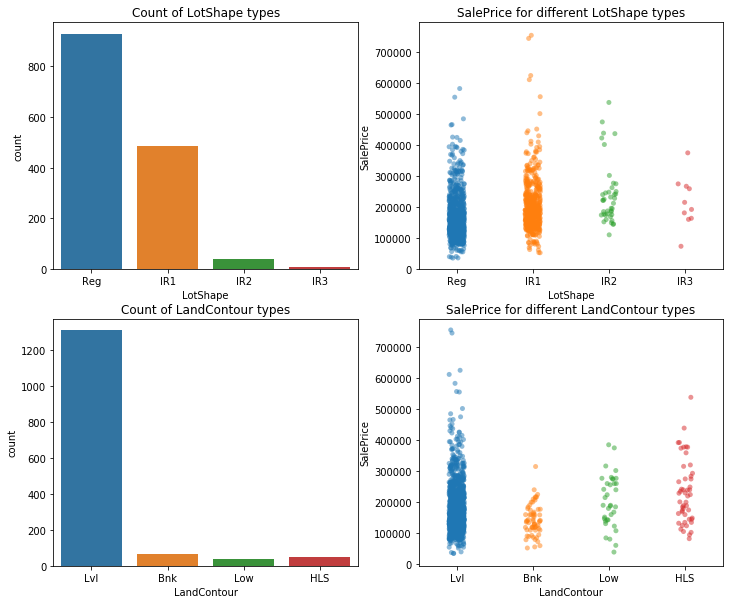

In [24]:
# LotShape - general shape of property
# Categorical feature, no missing

# LandContour - flatness of the property
# Categorical feature, no missing

fig, [(ax1, ax2), (ax3, ax4)] = plt.subplots(2, 2, figsize=(12, 10))

sns.countplot(data['LotShape'], ax=ax1)
ax1.set(title='Count of LotShape types')

sns.stripplot(x='LotShape', y='SalePrice', data=data, alpha=0.5, ax=ax2)
ax2.set(title='SalePrice for different LotShape types')

sns.countplot(data['LandContour'], ax=ax3)
ax3.set(title='Count of LandContour types')

sns.stripplot(x='LandContour', y='SalePrice', data=data, alpha=0.5, ax=ax4)
ax4.set(title='SalePrice for different LandContour types')

# Most houses had regular or slightly irregular shape and Near Flat/Level type of LandContour

[Text(0.5, 1.0, 'SalePrice for different LotConfig values')]

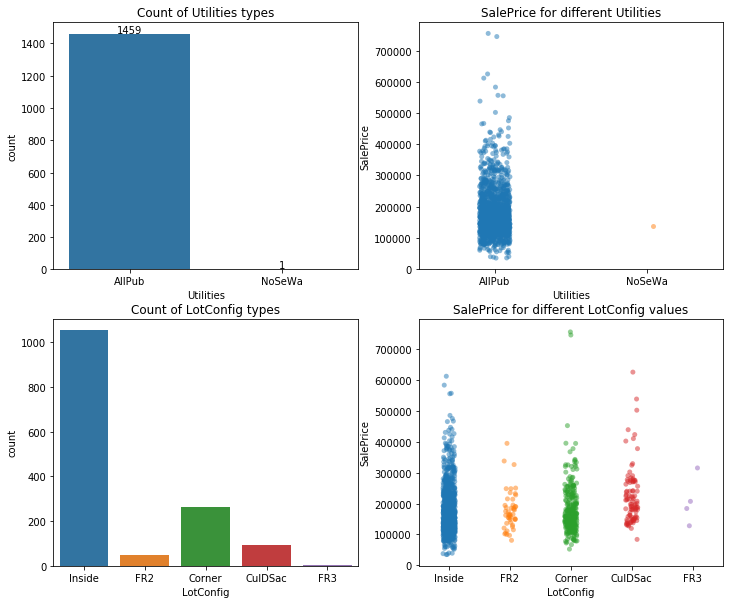

In [25]:
# Utilities - type of utilities available
# Categorical, no missing values

# LotConfig -  lot configuration
# Categorical, no missing values

fig, [(ax1, ax2), (ax3, ax4)] = plt.subplots(2, 2, figsize=(12, 10))

sns.countplot(data['Utilities'], ax=ax1)
ax1.set(title='Count of Utilities types')
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2.,
            height + 5,
            '{}'.format(height),
            ha='center')
    
sns.stripplot(x='Utilities', y='SalePrice', data=data, alpha=0.5, ax=ax2)
ax2.set(title='SalePrice for different Utilities')

sns.countplot(data['LotConfig'], ax=ax3)
ax3.set(title='Count of LotConfig types')

sns.stripplot(x='LotConfig', y='SalePrice', data=data, alpha=0.5, ax=ax4)
ax4.set(title='SalePrice for different LotConfig values')

# Nearly all houses had all public Utilities, except one
# Maybe Utilities feature is not that useful

[Text(0.5, 1.0, 'SalePrice for different LandSlope')]

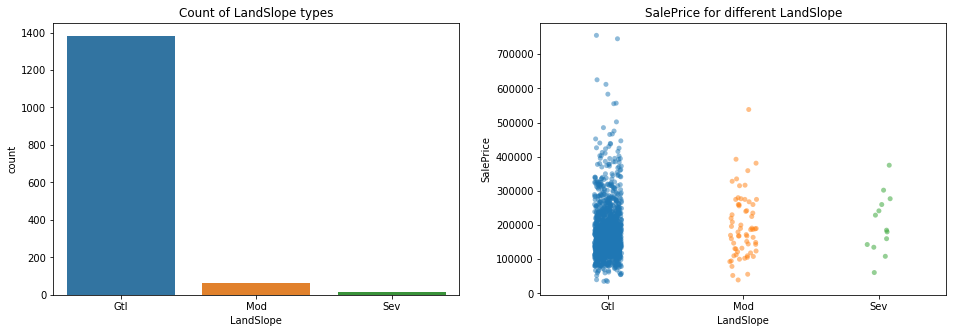

In [26]:
# LandSlope - slope of property, categorical, no missing

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(16, 5))

sns.countplot(data['LandSlope'], ax=ax1)
ax1.set(title='Count of LandSlope types')

sns.stripplot(x='LandSlope', y='SalePrice', data=data, alpha=0.5, ax=ax2)
ax2.set(title='SalePrice for different LandSlope')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

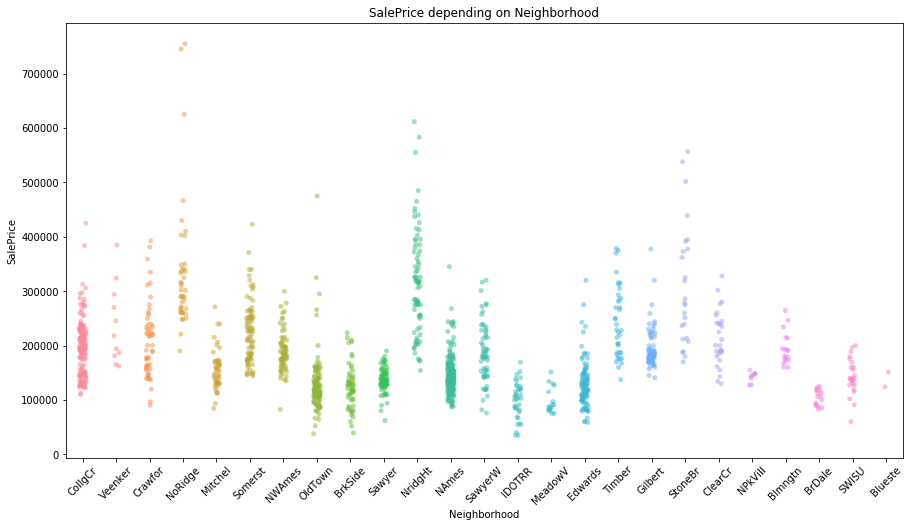

In [27]:
# Neighborhood - physical locations within Ames city limits, categorical, no missing
# Houses from different locations have different SalePrice distributions
# So, Neighborhood is important feature

plt.figure(figsize=(15,8))
sns.stripplot(x='Neighborhood', y='SalePrice', data=data, alpha=0.5)
plt.title('SalePrice depending on Neighborhood')
plt.xticks(rotation=45)

[Text(0.5, 1.0, 'SalePrice for different Condition2 types')]

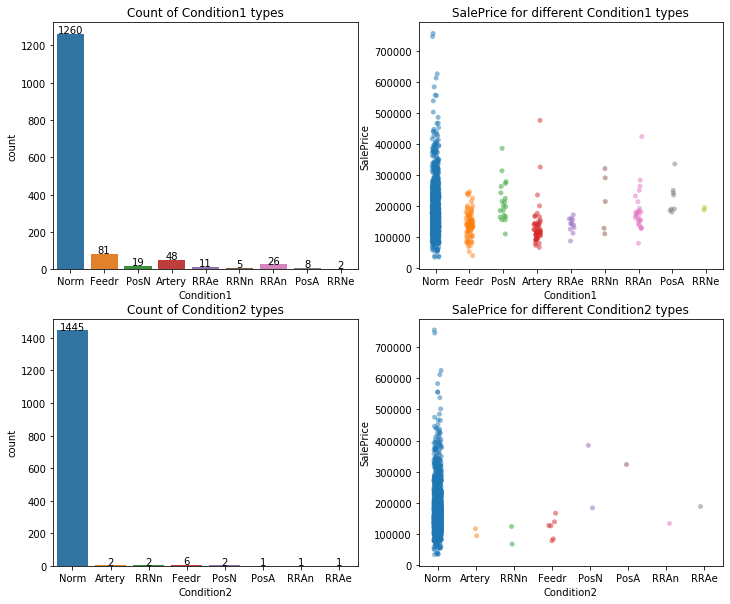

In [28]:
# Condition1 and Condition2 - categorical features, with no missing values
# Show proximity to various conditions in the city

fig, [(ax1, ax2), (ax3, ax4)] = plt.subplots(2, 2, figsize=(12, 10))

sns.countplot(data['Condition1'], ax=ax1)
ax1.set(title='Count of Condition1 types')
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2.,
            height + 5,
            '{}'.format(height),
            ha='center')
    
sns.stripplot(x='Condition1', y='SalePrice', data=data, alpha=0.5, ax=ax2)
ax2.set(title='SalePrice for different Condition1 types')

sns.countplot(data['Condition2'], ax=ax3)
ax3.set(title='Count of Condition2 types')
for p in ax3.patches:
    height = p.get_height()
    ax3.text(p.get_x() + p.get_width() / 2.,
            height + 5,
            '{}'.format(height),
            ha='center')
    
sns.stripplot(x='Condition2', y='SalePrice', data=data, alpha=0.5, ax=ax4)
ax4.set(title='SalePrice for different Condition2 types')

# Most houses have value 'Norm' for Condition1 and Condition2
# Other condition types may be grouped together

[Text(0.5, 1.0, 'SalePrice for different HouseStyle')]

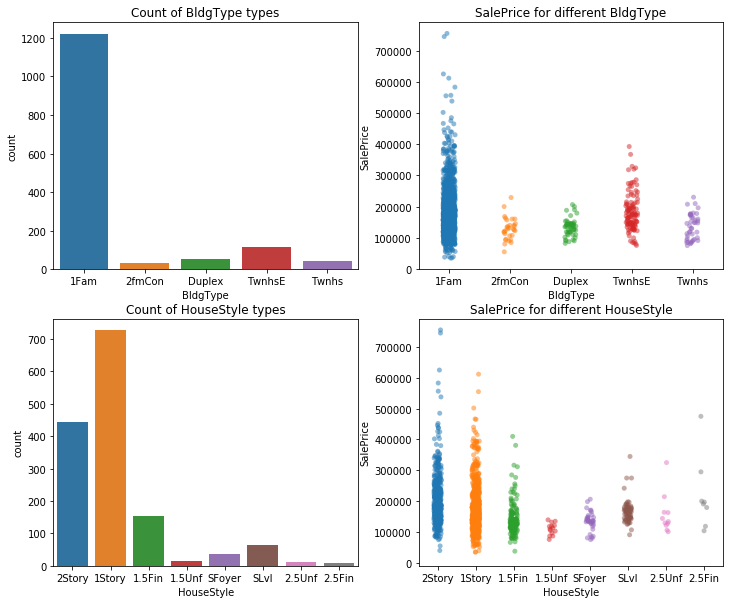

In [29]:
# BldgType - type of dwelling, categorical, no missing
# HouseStyle: Style of dwelling, categorical, no missing

fig, [(ax1, ax2), (ax3, ax4)] = plt.subplots(2, 2, figsize=(12, 10))

sns.countplot(data['BldgType'], ax=ax1)
ax1.set(title='Count of BldgType types')

sns.stripplot(x='BldgType', y='SalePrice', data=data, alpha=0.5, ax=ax2)
ax2.set(title='SalePrice for different BldgType')

sns.countplot(data['HouseStyle'], ax=ax3)
ax3.set(title='Count of HouseStyle types')

sns.stripplot(x='HouseStyle', y='SalePrice', data=data, alpha=0.5, ax=ax4)
ax4.set(title='SalePrice for different HouseStyle')

[Text(0.5, 1.0, 'SalePrice for different BsmtCond')]

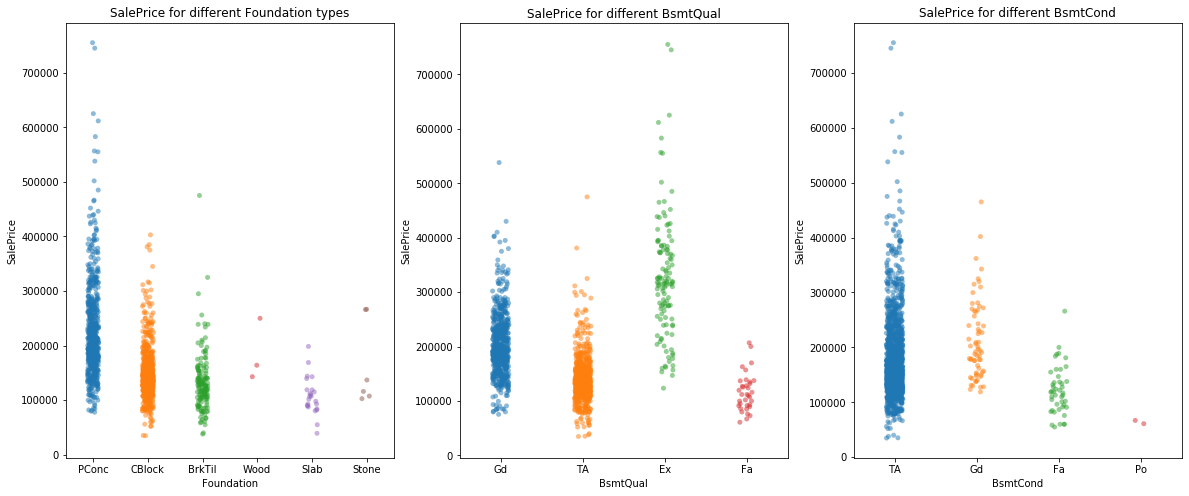

In [30]:
# Foundation - type of foundation, categorical, no missing
# BsmtQual - evaluates the height of the basement, categorical, NaN means no basement
# BsmtCond - evaluates the general condition of the basement, categorical, NaN means no basement

fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(20, 8))

sns.stripplot(x='Foundation', y='SalePrice', data=data, alpha=0.5, ax=ax1)
ax1.set(title='SalePrice for different Foundation types')

sns.stripplot(x='BsmtQual', y='SalePrice', data=data, alpha=0.5, ax=ax2)
ax2.set(title='SalePrice for different BsmtQual')

sns.stripplot(x='BsmtCond', y='SalePrice', data=data, alpha=0.5, ax=ax3)
ax3.set(title='SalePrice for different BsmtCond')

[Text(0.5, 1.0, 'Count of different BsmtCond')]

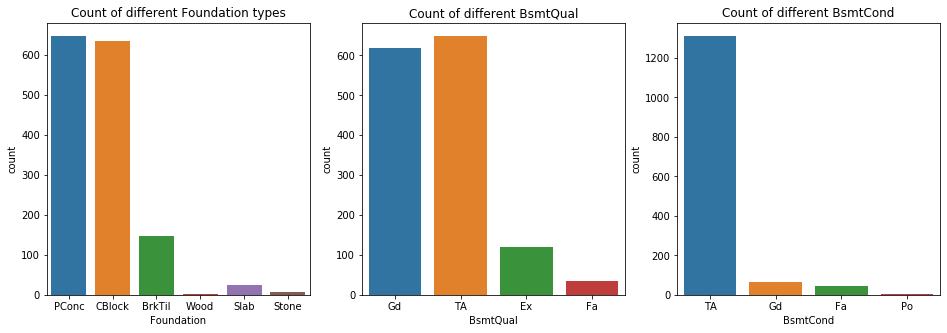

In [31]:
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(16, 5))

sns.countplot(data['Foundation'], ax=ax1)
ax1.set(title='Count of different Foundation types')

sns.countplot(data['BsmtQual'], ax=ax2)
ax2.set(title='Count of different BsmtQual')

sns.countplot(data['BsmtCond'], ax=ax3)
ax3.set(title='Count of different BsmtCond')

[Text(0.5, 1.0, 'SalePrice for different Heating types')]

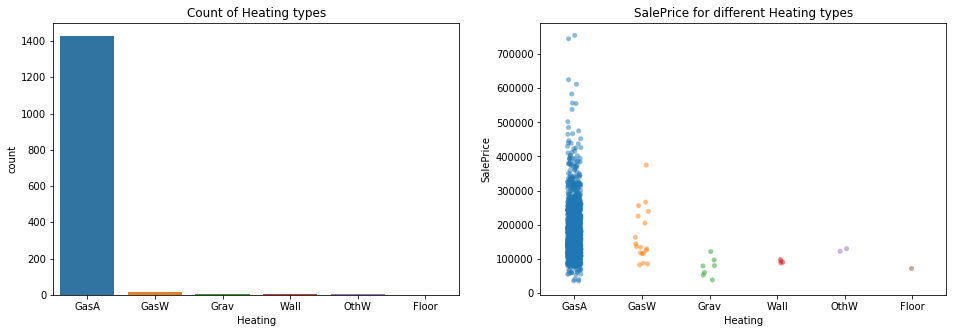

In [32]:
# Heating - type of heating

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(16, 5))
sns.countplot(data["Heating"], ax=ax1)
ax1.set(title='Count of Heating types')

sns.stripplot(x='Heating', y='SalePrice', data=data, alpha=0.5, ax=ax2)
ax2.set(title='SalePrice for different Heating types')

[Text(0.5, 1.0, 'SalePrice for different MiscFeature types')]

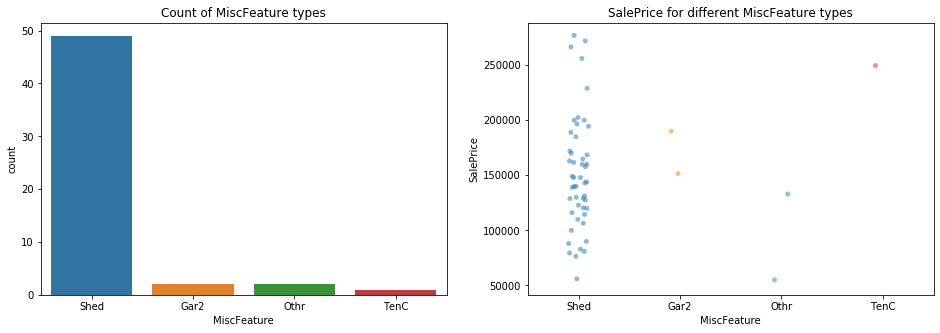

In [33]:
# MiscFeature - miscellaneous feature not covered in other categories

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(16, 5))
sns.countplot(data["MiscFeature"], ax=ax1)
ax1.set(title='Count of MiscFeature types')

sns.stripplot(x='MiscFeature', y='SalePrice', data=data, alpha=0.5, ax=ax2)
ax2.set(title='SalePrice for different MiscFeature types')

[Text(0.5, 1.0, 'SalePrice for different MSSubClass types')]

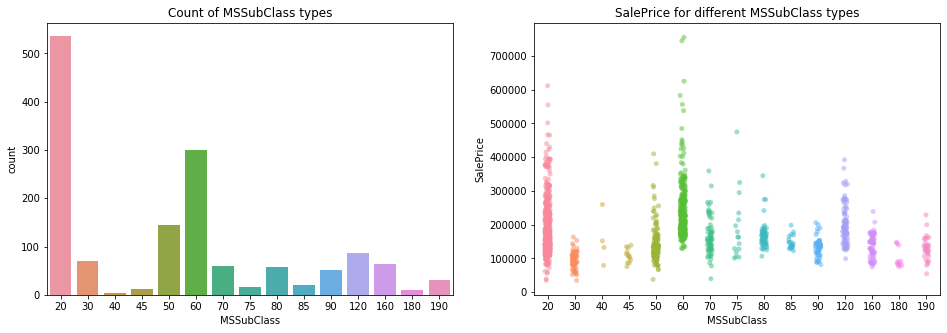

In [34]:
# MSSubClass - identifies the type of dwelling
# Actually categorical feature

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(16, 5))
sns.countplot(data["MSSubClass"], ax=ax1)
ax1.set(title='Count of MSSubClass types')

sns.stripplot(x='MSSubClass', y='SalePrice', data=data, alpha=0.5, ax=ax2)
ax2.set(title='SalePrice for different MSSubClass types')

[Text(0.5, 1.0, 'SalePrice depending on LotArea')]

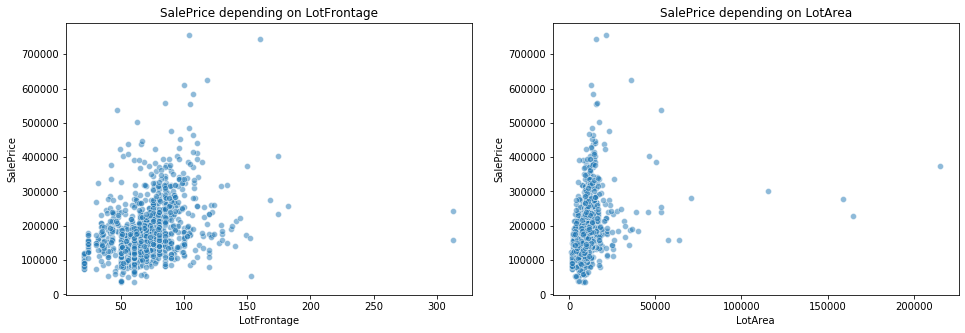

In [35]:
# LotFrontage - linear feet of street connected to property, contains missing values in train and test data
# LotArea - lot size in square feet

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(16, 5))

sns.scatterplot(x='LotFrontage', y='SalePrice', data=data, alpha=0.5, ax=ax1)
ax1.set(title='SalePrice depending on LotFrontage')

sns.scatterplot(x='LotArea', y='SalePrice', data=data, alpha=0.5, ax=ax2)
ax2.set(title='SalePrice depending on LotArea')

# Outliers found: 
# with large LotFrontage and low SalePrice
# with large LotArea and low SalePrice

[Text(0.5, 1.0, 'SalePrice for different OverallCond types')]

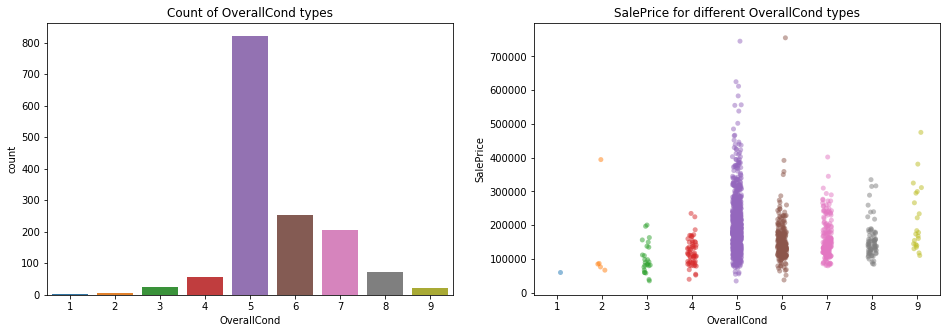

In [36]:
# OverallCond - numerical overall condition of the house (1 - very poor, 10 - excellent)

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(16, 5))
sns.countplot(data["OverallCond"], ax=ax1)
ax1.set(title='Count of OverallCond types')

sns.stripplot(x='OverallCond', y='SalePrice', data=data, alpha=0.5, ax=ax2)
ax2.set(title='SalePrice for different OverallCond types')

# Most houses had 5, 6 or 7 (Average, Above average, Good) quality
# Houses with low overall quality had lower SalePrice

[Text(0.5, 1.0, 'SalePrice depending on 2ndFlrSF')]

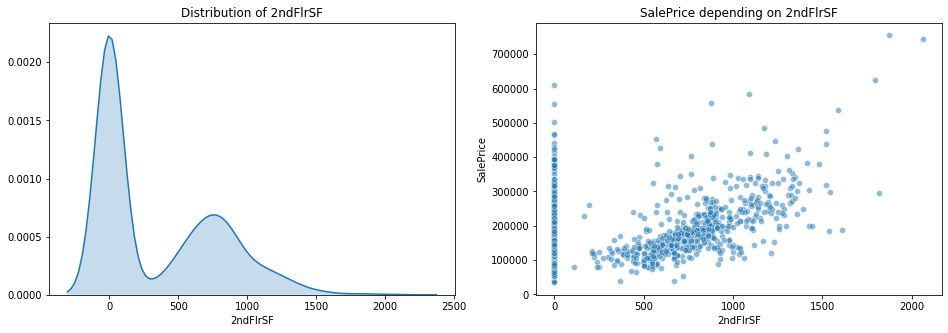

In [37]:
# 2ndFlrSF - second floor square feet

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(16, 5))
sns.distplot(data['2ndFlrSF'], hist=False, kde=True, kde_kws={'shade':True}, ax=ax1)
ax1.set(title='Distribution of 2ndFlrSF')

sns.scatterplot(x='2ndFlrSF', y='SalePrice', data=data, alpha=0.5, ax=ax2)
ax2.set(title='SalePrice depending on 2ndFlrSF')

# A lot of houses had no second floor

[Text(0.5, 1.0, 'SalePrice for different Fireplaces number')]

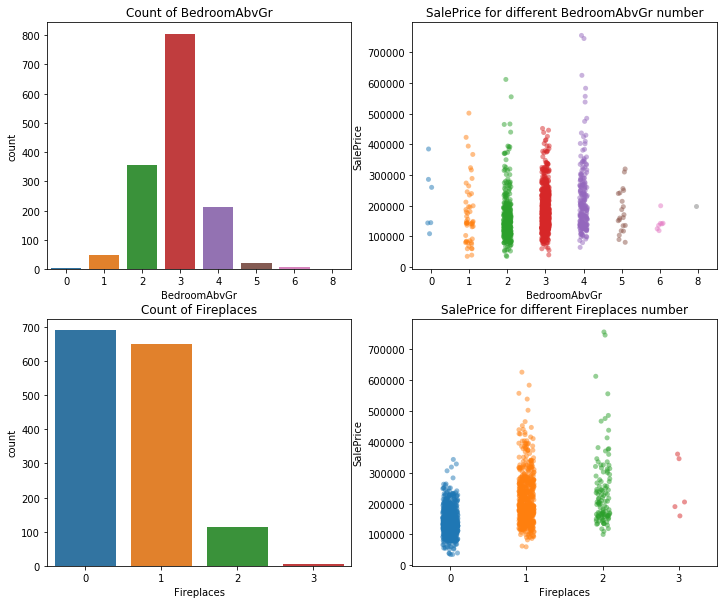

In [38]:
# BedroomAbvGr - number of bedrooms without basement bedrooms

# Fireplaces - number of fireplaces

fig, [(ax1, ax2), (ax3, ax4)] = plt.subplots(2, 2, figsize=(12, 10))

sns.countplot(data['BedroomAbvGr'], ax=ax1)
ax1.set(title='Count of BedroomAbvGr')

sns.stripplot(x='BedroomAbvGr', y='SalePrice', data=data, alpha=0.5, ax=ax2)
ax2.set(title='SalePrice for different BedroomAbvGr number')

sns.countplot(data['Fireplaces'], ax=ax3)
ax3.set(title='Count of Fireplaces')

sns.stripplot(x='Fireplaces', y='SalePrice', data=data, alpha=0.5, ax=ax4)
ax4.set(title='SalePrice for different Fireplaces number')

# Most houses had 2 or 3 bedrooms and 0 or 1 fireplace
# Maybe 2 and 3 fireplaces number should be combined

[Text(0.5, 1.0, 'Dependence between GarageYrBlt and YearBuilt')]

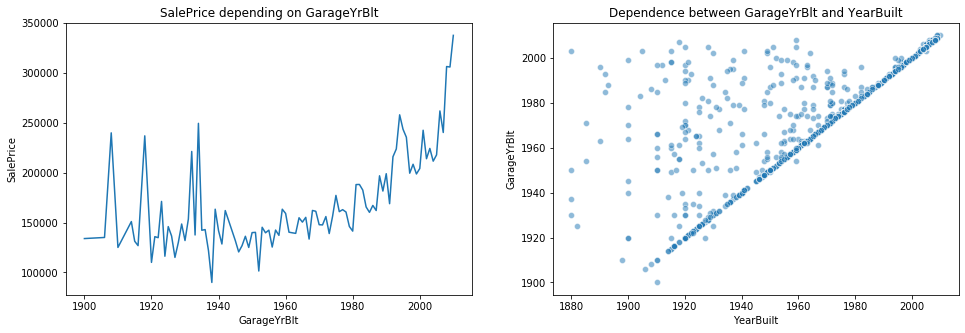

In [39]:
# GarageYrBlt - year the garage was built

mean_price_garage_year = data[['GarageYrBlt', 'SalePrice']].groupby('GarageYrBlt', as_index=False).mean()

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(16, 5))

sns.lineplot(x='GarageYrBlt', y='SalePrice', data=mean_price_garage_year, ax=ax1)
ax1.set(title='SalePrice depending on GarageYrBlt')

sns.scatterplot(x='YearBuilt', y='GarageYrBlt', data=data, alpha=0.5, ax=ax2)
ax2.set(title='Dependence between GarageYrBlt and YearBuilt')

# A lot of houses had the same GarageYrBlt and YearBuilt
# Binary feature may be created whether or not garage was built after house construction 
# Samples with GarageYrBlt less than YearBuilt should be removed|replaced

Minimum SalePrice:  34900
Maximum SalePrice:  755000


Text(0.5, 1.0, 'SalePrice distribution from train data')

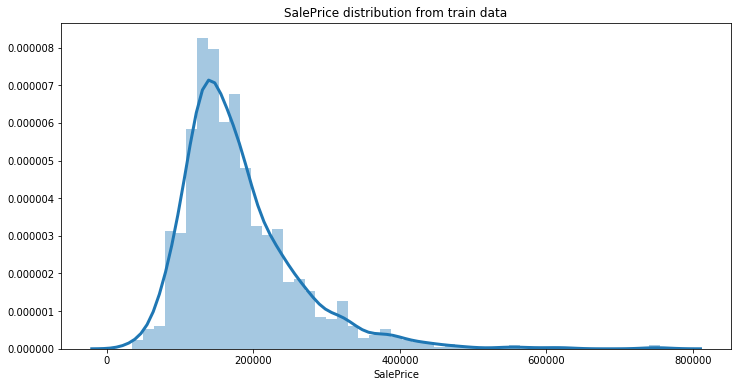

In [40]:
# SalePrice - target variable

print('Minimum SalePrice: ', data['SalePrice'].min())
print('Maximum SalePrice: ', data['SalePrice'].max())

plt.figure(figsize=(12,6)) 
sns.distplot(data['SalePrice'], kde=True, kde_kws={'linewidth':3})
plt.title('SalePrice distribution from train data')

Text(0.5, 1.0, 'SalePrice distribution Transformed')

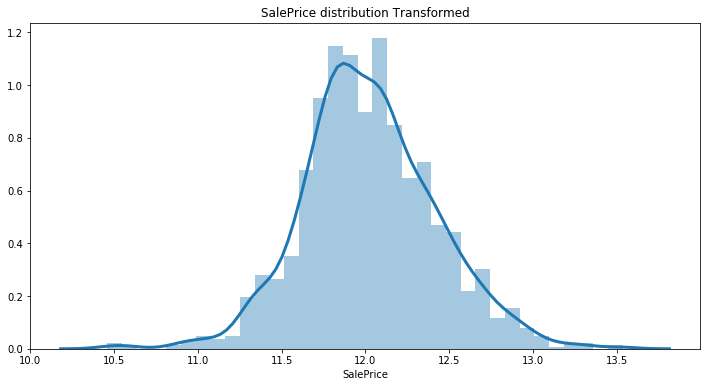

In [41]:
# Target variable is right-skewed
# Apply log transformation to make more symmetrical distribution

transformed_target = np.log1p(target)

# Check target symmetry

plt.figure(figsize=(12,6)) 
sns.distplot(transformed_target, kde=True, kde_kws={'linewidth':3})
plt.title('SalePrice distribution Transformed')

# Now other skewed features also require log transformation

### Next step - impute missing values in all features of train and test data.

In [42]:
# Double check missing values in all data

display(missing_values_df.sort_values(by='%', ascending=False))

Columns,Train,Test,All,%
PoolQC,1453,1456.0,2909,0.996574
MiscFeature,1406,1408.0,2814,0.964029
Alley,1369,1352.0,2721,0.932169
Fence,1179,1169.0,2348,0.804385
SalePrice,0,NaN,1459,0.499829
FireplaceQu,690,730.0,1420,0.486468
LotFrontage,259,227.0,486,0.166495
GarageCond,81,78.0,159,0.054471
GarageYrBlt,81,78.0,159,0.054471
GarageFinish,81,78.0,159,0.054471


Types of treatment missing values: 
1. Fill with None, if missing value has meaning - absence of categorical feature.
2. Fill with 0, if missing value has meaning and feature is numerical.
3. Fill with mode, if there are no meaning in missing categorical feature.
4. Special cases.

In [43]:
# 1 case. Example from https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data:
# PoolQC: Pool quality - NA: No Pool

datasets = [data, test_data]
categorical_absent = ['PoolQC', 'MiscFeature', 'Alley', 'Fence',
                     'FireplaceQu', 'GarageCond', 'GarageFinish',
                     'GarageQual', 'GarageType', 'BsmtExposure',
                     'BsmtCond', 'BsmtQual', 'BsmtFinType2',
                     'BsmtFinType1']
for dataset in datasets:
    for feature in categorical_absent:
        dataset[feature].fillna('None', inplace=True)

In [44]:
# 2 case. Fill GarageCars with 0 if there are no Garage.
# Fill basement-related numerical features with 0 if there is no basement.

numerical_absent = ['MasVnrArea', 'GarageCars', 'GarageArea',
                   'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                   'TotalBsmtSF', 'GarageYrBlt']
for dataset in datasets:
    for feature in numerical_absent:
        dataset[feature].fillna(0, inplace=True)

In [45]:
# Look at other numerical features with missing values

half_bath = pd.DataFrame(columns=['Test', 'Train', 'All Data'])
half_bath['Test'] = test_data['BsmtHalfBath'].value_counts()
half_bath['Train'] = data['BsmtHalfBath'].value_counts()
half_bath['All Data'] = all_data['BsmtHalfBath'].value_counts()
print('Basement half bathrooms:')
display(half_bath)

full_bath = pd.DataFrame(columns=['Test', 'Train', 'All Data'])
full_bath['Test'] = test_data['BsmtFullBath'].value_counts()
full_bath['Train'] = data['BsmtFullBath'].value_counts()
full_bath['All Data'] = all_data['BsmtFullBath'].value_counts()
print('Basement full bathrooms:')
display(full_bath)

Basement half bathrooms:


,Test,Train,All Data
0.0,1364,1378,2742
1.0,91,80,171
2.0,2,2,4


Basement full bathrooms:


,Test,Train,All Data
0.0,849,856,1705
1.0,584,588,1172
2.0,23,15,38
3.0,1,1,2


In [46]:
# Zero is also the most frequent value for these features
# The same imputing strategy

numerical_absent_bath = ['BsmtHalfBath', 'BsmtFullBath']
for dataset in datasets:
    for feature in numerical_absent_bath:
        dataset[feature].fillna(0, inplace=True)

In [47]:
# In the test part of data strange house was found with known GarageType
# and unknown other Garage-related features 

all_data[all_data['GarageCars'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2576,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,NaN


Mode of MasVnrType: train - None, test - None


[Text(0.5, 1.0, 'Count of MasVnrType in test data')]

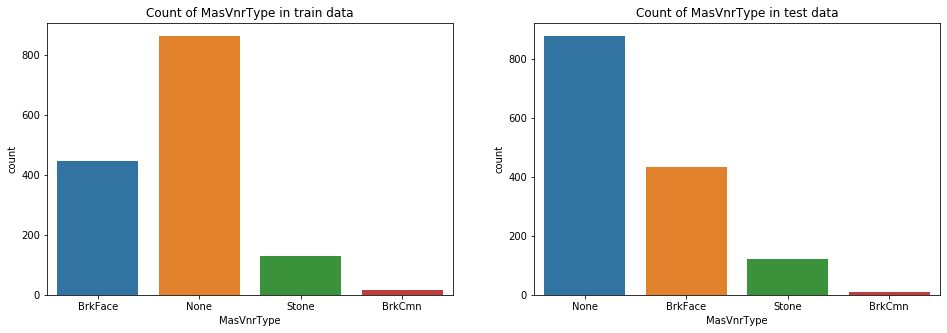

In [48]:
# 3 case. Fill Masonry veneer type with most frequent type
# Fill other categorical features with most frequent categories

# Look at some categorical features

print('Mode of MasVnrType: train - {0}, test - {1}'.format(data['MasVnrType'].mode()[0],
                                                           test_data['MasVnrType'].mode()[0]))
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(16, 5))
sns.countplot(data['MasVnrType'], ax=ax1)
ax1.set(title='Count of MasVnrType in train data')

sns.countplot(test_data['MasVnrType'], ax=ax2)
ax2.set(title='Count of MasVnrType in test data')

In [49]:
# Strange house found in test data with known MasVnrArea and unknown MasVnrType
# As it has area, should be imputed with second most frequent MasVnrType

test_data.loc[1150, ['MasVnrType', 'MasVnrArea']]

MasVnrType    NaN
MasVnrArea    198
Name: 1150, dtype: object

In [50]:
test_data.at[1150, 'MasVnrType'] = test_data['MasVnrType'].value_counts().index[1]

Mode of KitchenQual: train - TA, test - TA


[Text(0.5, 1.0, 'Count of KitchenQual in test data')]

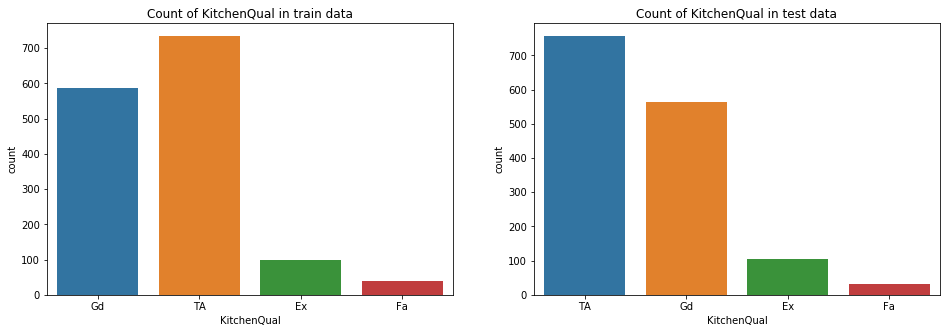

In [51]:
print('Mode of KitchenQual: train - {0}, test - {1}'.format(data['KitchenQual'].mode()[0],
                                                           test_data['KitchenQual'].mode()[0]))
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(16, 5))
sns.countplot(data['KitchenQual'], ax=ax1)
ax1.set(title='Count of KitchenQual in train data')

sns.countplot(test_data['KitchenQual'], ax=ax2)
ax2.set(title='Count of KitchenQual in test data')

In [52]:
categorical_mode = ['MasVnrType', 'MSZoning', 'Utilities',
                   'KitchenQual', 'Exterior1st', 'Exterior2nd',
                   'SaleType', 'Electrical']
for dataset in datasets:
    for feature in categorical_mode:
        dataset[feature].fillna(dataset[feature].mode()[0], inplace=True)

In [53]:
# 4 case

# Fill LotFrontage with median value in Neighborhood

for dataset in datasets:
    dataset['LotFrontage'].fillna(dataset.groupby('Neighborhood')['LotFrontage'].transform('median'),
                                 inplace=True)

In [54]:
# Fill Functional with Typical

for dataset in datasets:
    dataset['Functional'].fillna('Typ', inplace=True)

In [55]:
# Strange houses found with garage built before the house construction

data[(data['GarageYrBlt'] < data['YearBuilt']) & (data['GarageYrBlt'] != 0)][['GarageYrBlt', 'YearBuilt']]

,GarageYrBlt,YearBuilt
29,1920.0,1927
93,1900.0,1910
324,1961.0,1967
600,2003.0,2005
736,1949.0,1950
1103,1954.0,1959
1376,1925.0,1930
1414,1922.0,1923
1418,1962.0,1963


In [56]:
# Fix GarageYrBt < YearBuilt situation by making these years equal

for dataset in datasets:
    dataset.loc[(dataset['GarageYrBlt'] < dataset['YearBuilt']) & (dataset['GarageYrBlt'] != 0), 'GarageYrBlt'] = dataset['YearBuilt']

In [57]:
# Strange house in test data found with GarageYrBt > current year

test_data['GarageYrBlt'].sort_values(ascending=False).head()

1132    2207.0
148     2010.0
42      2010.0
116     2010.0
404     2009.0
Name: GarageYrBlt, dtype: float64

In [58]:
# Fix GarageYrBt > current year situation by making it equal to YearBuilt of the house

display(test_data[test_data['GarageYrBlt'] > 2010][['GarageYrBlt', 'YearBuilt']])
test_data.loc[test_data['GarageYrBlt'] > 2010, 'GarageYrBlt'] = 2006

,GarageYrBlt,YearBuilt
1132,2207.0,2006


In [59]:
# Check for missing values again

missing_values_df = pd.concat([data.isnull().sum(), test_data.isnull().sum()],
                              axis=1, sort=False,
                              keys=['Train', 'Test'],
                              names=['Columns'])
missing_values_df = missing_values_df[(missing_values_df['Train'] > 0) | (missing_values_df['Test'] > 0)]
display(missing_values_df) 
print('Number of columns with missing values: {}'.format(missing_values_df.shape[0]))

Columns,Train,Test


Number of columns with missing values: 0


In [60]:
# Remove found ouliers from train data

data.drop(data[data['GrLivArea'] > 4500].index, inplace=True)

#data.drop(data[data['LotArea'] > 100000].index, inplace=True)
#data.drop(data[data['LotFrontage'] > 300].index, inplace=True)

In [61]:
# Create new features from existing

for dataset in datasets:
    dataset['TotalSF'] = dataset['TotalBsmtSF'] + dataset['1stFlrSF'] + dataset['2ndFlrSF']
    
    dataset['AllBath'] = (dataset['BsmtFullBath'] + 0.5 * dataset['BsmtHalfBath'] +
                          dataset['FullBath'] + 0.5 * dataset['HalfBath'])
    
    dataset['PorchArea'] = (dataset['WoodDeckSF'] + dataset['OpenPorchSF']
                            + dataset['EnclosedPorch'] + dataset['3SsnPorch']
                            + dataset['ScreenPorch'])
    
    dataset['HadReconstruction'] = np.where(dataset['YearBuilt'] == dataset['YearRemodAdd'], 0, 1)
    
    dataset['Has2ndFloor'] = np.where(dataset['2ndFlrSF'] == 0, 0, 1)
    
    dataset['HeatingCat'] = dataset['Heating'].map({'Floor': 'Other', 'Grav': 'Other',
                                       'OthW': 'Other', 'Wall': 'Other',
                                       'GasA': 'GasA', 'GasW': 'GasW'})
    
    dataset['OverallCondType'] = dataset['OverallCond'].map({1: 'Low', 2: 'Low',
                                       3: 'Low', 4: 'Low', 5: 'Norm',
                                       6: 'Norm', 7: 'Norm', 8: 'Norm',
                                       9: 'Norm'})
    
    dataset['GarageOld'] = np.where(dataset['GarageYrBlt'] == dataset['YearBuilt'], 1, 0)
    
    dataset['HasGarage'] = np.where(dataset['GarageArea'] == 0, 0, 1)
    
    dataset['HasPool'] = np.where(dataset['PoolArea'] == 0, 0, 1)
    
    dataset['HasFireplace'] = np.where(dataset['Fireplaces'] == 0, 0, 1)

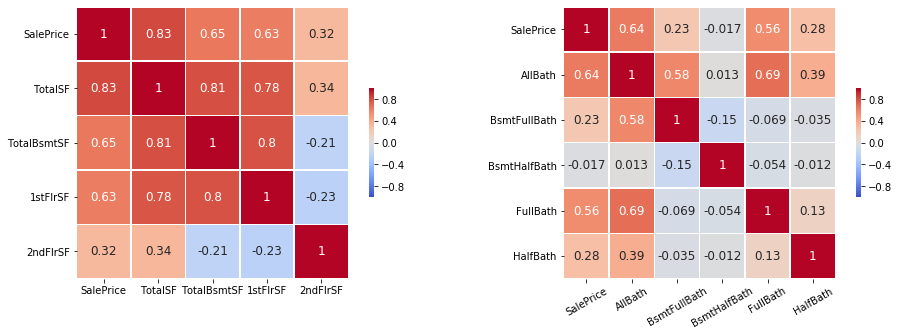

In [62]:
# Look at new features and their impact on target

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(16,5))

SF_matrix = data[['SalePrice', 'TotalSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF']]
SF_heatmap = sns.heatmap(SF_matrix.corr(),
                     square=True,
                     linewidths = .5,
                     cmap = 'coolwarm',
                     cbar_kws = {'shrink': .4},
                     vmin = -1, 
                     vmax = 1,
                     annot = True,
                     annot_kws = {'size': 12},
                     ax=ax1)
ax1.set_yticklabels(SF_matrix.columns, rotation = 0)
ax1.set_xticklabels(SF_matrix.columns)

bath_matrix = data[['SalePrice', 'AllBath', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']]
bath_heatmap = sns.heatmap(bath_matrix.corr(),
                     square=True,
                     linewidths = .5,
                     cmap = 'coolwarm',
                     cbar_kws = {'shrink': .4},
                     vmin = -1, 
                     vmax = 1,
                     annot = True,
                     annot_kws = {'size': 12},
                     ax=ax2)
ax2.set_yticklabels(bath_matrix.columns, rotation = 0)
ax2.set_xticklabels(bath_matrix.columns, rotation = 30)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

# TotalSF is useful predictor
# 2ndFlrSF may be dropped (and 1stFlrSF)

# AllBath is useful predictor

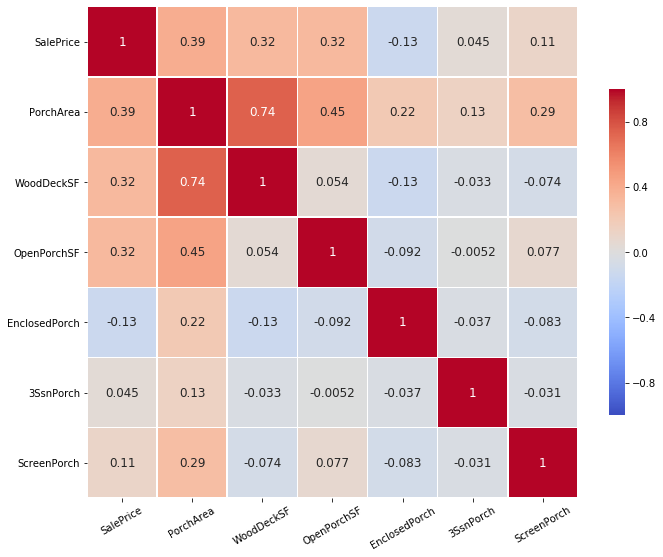

In [63]:
porch_matrix = data[['SalePrice', 'PorchArea', 'WoodDeckSF', 'OpenPorchSF',
                     'EnclosedPorch', '3SsnPorch', 'ScreenPorch']]
fig, ax = plt.subplots(figsize=(11, 15))
porch_heatmap = sns.heatmap(porch_matrix.corr(),
                     square=True,
                     linewidths = .5,
                     cmap = 'coolwarm',
                     cbar_kws = {'shrink': .4},
                     vmin = -1, 
                     vmax = 1,
                     annot = True,
                     annot_kws = {'size': 12})
ax.set_yticklabels(porch_matrix.columns)
ax.set_xticklabels(porch_matrix.columns, rotation = 30)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

# PorchArea is useful predictor, mostly correlated with WoodDeckSF

[Text(0.5, 1.0, 'SalePrice for houses without/with 2nd floor')]

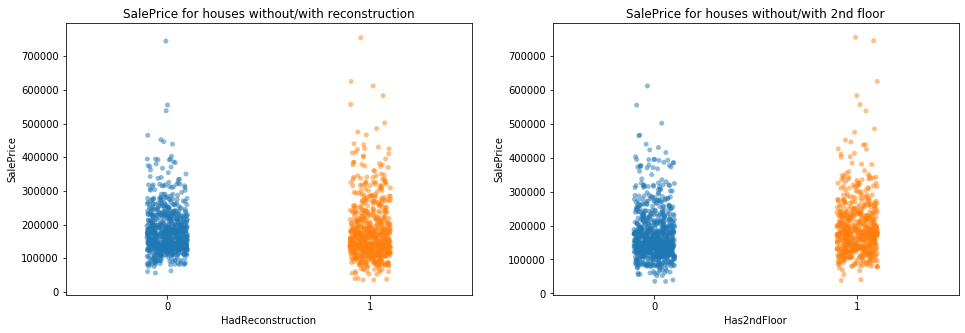

In [64]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(16, 5))

sns.stripplot(x='HadReconstruction', y='SalePrice', data=data, alpha=0.5, ax=ax1)
ax1.set(title='SalePrice for houses without/with reconstruction')

sns.stripplot(x='Has2ndFloor', y='SalePrice', data=data, alpha=0.5, ax=ax2)
ax2.set(title='SalePrice for houses without/with 2nd floor')

# HadReconstruction feature may be not useful for prediction

[Text(0.5, 1.0, 'SalePrice for different OverallCondType')]

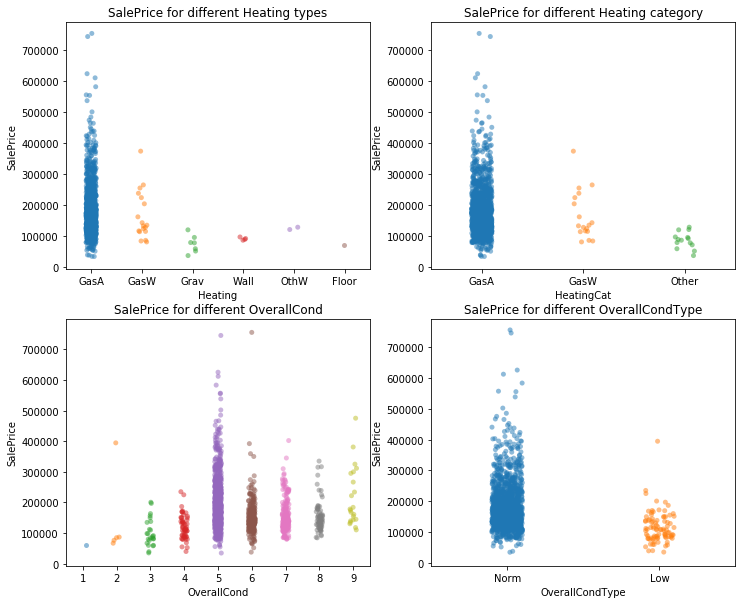

In [65]:
fig, [(ax1, ax2), (ax3, ax4)] = plt.subplots(2, 2, figsize=(12, 10))

sns.stripplot(x='Heating', y='SalePrice', data=data, alpha=0.5, ax=ax1)
ax1.set(title='SalePrice for different Heating types')

sns.stripplot(x='HeatingCat', y='SalePrice', data=data, alpha=0.5, ax=ax2)
ax2.set(title='SalePrice for different Heating category')

sns.stripplot(x='OverallCond', y='SalePrice', data=data, alpha=0.5, ax=ax3)
ax3.set(title='SalePrice for different OverallCond')

sns.stripplot(x='OverallCondType', y='SalePrice', data=data, alpha=0.5, ax=ax4)
ax4.set(title='SalePrice for different OverallCondType')

[Text(0.5, 1.0, 'SalePrice for houses without/with garage')]

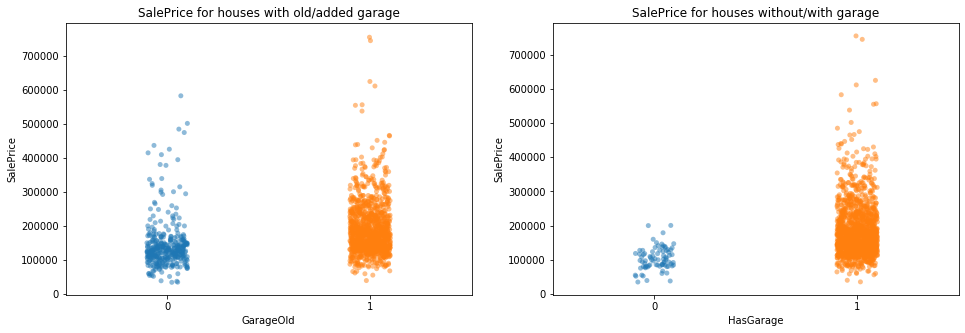

In [66]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(16, 5))

sns.stripplot(x='GarageOld', y='SalePrice', data=data, alpha=0.5, ax=ax1)
ax1.set(title='SalePrice for houses with old/added garage')

sns.stripplot(x='HasGarage', y='SalePrice', data=data, alpha=0.5, ax=ax2)
ax2.set(title='SalePrice for houses without/with garage')

[Text(0.5, 1.0, 'SalePrice for houses without/with fireplace')]

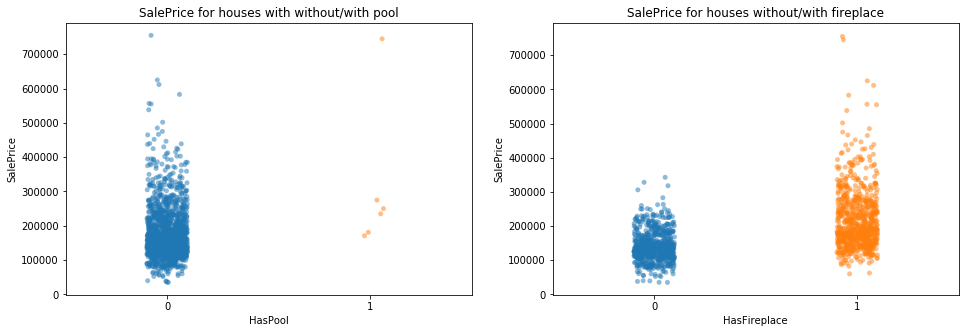

In [67]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(16, 5))

sns.stripplot(x='HasPool', y='SalePrice', data=data, alpha=0.5, ax=ax1)
ax1.set(title='SalePrice for houses with without/with pool')

sns.stripplot(x='HasFireplace', y='SalePrice', data=data, alpha=0.5, ax=ax2)
ax2.set(title='SalePrice for houses without/with fireplace')

# HasPool may be not useful for prediction

### Next step - encoding of new and existing categorical features.